# **Ridge Regression From Scratch m and b**

In [18]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt 
import numpy as np

In [19]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13)

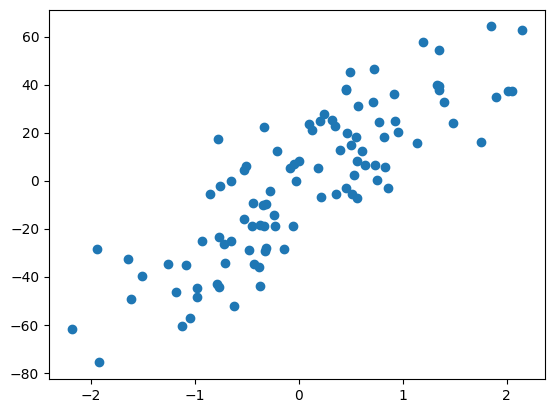

In [20]:
plt.scatter(X,y)

In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [22]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=10)
rr.fit(X,y)
print(rr.coef_)
print(rr.intercept_)

y_pred_ = rr.predict(X)

from sklearn.metrics import r2_score
r2_score(y, y_pred_)

[24.9546267]
-2.1269130035235726


0.6960172225909291

In [23]:
rr1 = Ridge(alpha=100)
rr1.fit(X,y)
print(rr1.coef_)
print(rr1.intercept_)

[12.93442104]
-1.4248441496033306


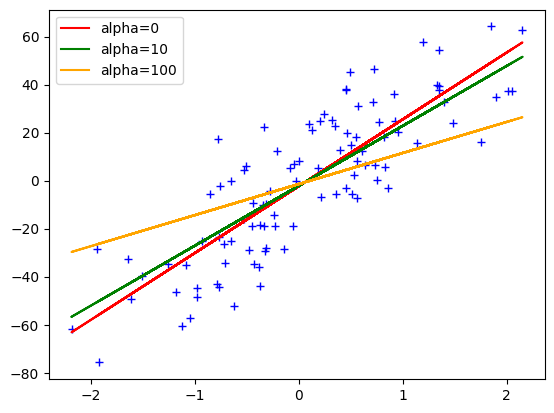

In [24]:
plt.plot(X,y,'b+')
plt.plot(X,lr.predict(X), color='red', label='alpha=0')
plt.plot(X,rr.predict(X), color='green', label='alpha=10')
plt.plot(X,rr1.predict(X), color='orange', label='alpha=100')
plt.legend()
plt.show()


In [26]:
class MeraRidge:

    def __init__(self, alpha=0.1):
        self.alpha = alpha 
        self.m = None
        self.b = None

    def fit(self, X_train, y_train):
        num = 0
        den = 0

        for i in range(X_train.shape[0]):
            num = num + (y_train[i] - y_train.mean()) * (X_train[i] - X_train.mean())
            den = den + (X_train[i] - X_train.mean()) * (X_train[i] - X_train.mean())

        self.m = num/(den + self.alpha)
        self.b = y_train.mean() - (self.m*X_train.mean())

    def predict(self,X_test):
        return X_test * self.m + self.b

In [27]:
reg = MeraRidge(alpha=10)
reg.fit(X,y)

In [28]:
y_pred = reg.predict(X)
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.6960172225909291